# Estimation of MET cross section with Madgraph 3.6.2

## Import MG5 and dependencies

In [4]:
import os
import sys
from madgrapy import madpy_generate_script, madpy_run, convert_from_folder
#from madpy import madpy_generate_script, convert_eps_to_pdf, madpy_run
from dataclasses import dataclass
import pandas as pd 

import tarfile
import os
import subprocess
from subprocess import Popen, PIPE, CalledProcessError
from pathlib import Path
import sys

MADGRAPH_PATH = f"../mg5amcnlo"
sys.path.append(MADGRAPH_PATH)

In [5]:
from pathlib import Path



## Install models and plugins

### [ALPsEFT](https://feynrules.irmp.ucl.ac.be/wiki/ALPsEFT)



In [6]:

## Parameters

workdir_path = "./workdir"
process_name = "ALP_TT"
process =  "p p > t t~ a"
model =  "Axion_EFT_UFO"
process_name = process_name
process_dir = process_name
number_events = 1000000
sm_coupling_value = 0.25
decays = {"9000001": "Auto",
        "9000002": "Auto",
        "9000003": "Auto",
        "9000004": "Auto"}
masses_dict = {"maxion": 1000}
decays = None
# dm_coup_list = ['gsxr', "gsxc", 'gsxd', 'gpxd']
# sm_coup_list = ["gsd11", "gsu11", "gsd22", "gsu22", "gsd33", "gsu33", "gpd11", "gpu11", "gpd22",
#                 "gpu22", "gpd33", "gpu33", "gsg", "gpg", "gsh1", "gsh2", "gsb", "gpb", "gsw", "gpw"]
dm_coup_list = ['gSXd', "gSXc ", 'gsxr']
sm_coup_list = ["gSe"]


In [7]:
full_script_str, mg5_script_path, workdir_process = madpy_generate_script(process = process,
                                                        models = model,
                                                        process_name = process_name,
                                                        masses = masses_dict,
                                                        #coupling = coups_dict,
                                                        #decays = decays,
                                                        pt_cut = None,
                                                        madspin = False, ## For e+e-, madspin = False
                                                        workdir_path = workdir_path,
                                                        number_events = number_events,
                                                        beam_energy1 = 6800,
                                                        beam_energy2 = 6800,
                                                         )

#mg5_script_complete_path = madpy_run(process_name, mg5_script_folder_path = ".")

MG5 script generated

 import model Axion_EFT_UFO
 generate p p > t t~ a
 output ./workdir/ALP_TT -f
 display diagrams ./workdir/ALP_TT
 launch ./workdir/ALP_TT
	set mass maxion 1000
	set nevents 1000000
	set run_card ebeam1 = 6800
	set run_card ebeam2 = 6800
	set run_card lpp1 = 1
	set run_card lpp2 = 1
	set run_card pdlabel = LHAPDF
	set run_card lhaid = 315000


In [26]:
mg5_script_complete_path = madpy_run(madgraph_path="/opt/apps/madgraph/3.6.6", process_name = process_name, mg5_script_folder_path = f".")

Check the mg5 log on ALP_TT.log


stty: 'standard input': Inappropriate ioctl for device
Command "generate_events run_01" interrupted with error:
OSError : [Errno 36] File name too long: '/home/mjrxy/mardsouza/madpy/notebooks/workdir/ALP_TT/Events/run_01/sub.python3-O._home_mjrxy_mardsouza_madpy_notebooks_workdir_ALP_TT_bin_internal_systematics.py.unweighted_events.lhe.gz.._tmp_0_unweighted_events.lhe.gz.--mur=0.5,1,2.--muf=0.5,1,2.--pdf=errorset.--start_event=0.--stop_event=10417.--result=._log_sys_0.txt.--lhapdf_config=_opt_apps_lhapdf_bin_lhapdf-config'
Please report this bug on https://bugs.launchpad.net/mg5amcnlo
More information is found in '/home/mjrxy/mardsouza/madpy/notebooks/workdir/ALP_TT/run_01_tag_1_debug.log'.
Please attach this file to your report.


## Convert the generated Feynman Diagrams

In [8]:
convert_from_folder(workdir_process, workdir_process+'/diagrams')


Found 5 EPS file(s) to convert

Converting: diagrams_1_gg_ttxa.eps → diagrams_1_gg_ttxa.pdf
Successfully converted workdir/ALP_TT/diagrams_1_gg_ttxa.eps to workdir/ALP_TT/diagrams/diagrams_1_gg_ttxa.pdf

Converting: diagrams_1_ccx_ttxa.eps → diagrams_1_ccx_ttxa.pdf
Successfully converted workdir/ALP_TT/diagrams_1_ccx_ttxa.eps to workdir/ALP_TT/diagrams/diagrams_1_ccx_ttxa.pdf

Converting: diagrams_1_ssx_ttxa.eps → diagrams_1_ssx_ttxa.pdf
Successfully converted workdir/ALP_TT/diagrams_1_ssx_ttxa.eps to workdir/ALP_TT/diagrams/diagrams_1_ssx_ttxa.pdf

Converting: diagrams_1_ddx_ttxa.eps → diagrams_1_ddx_ttxa.pdf
Successfully converted workdir/ALP_TT/diagrams_1_ddx_ttxa.eps to workdir/ALP_TT/diagrams/diagrams_1_ddx_ttxa.pdf

Converting: diagrams_1_uux_ttxa.eps → diagrams_1_uux_ttxa.pdf
Successfully converted workdir/ALP_TT/diagrams_1_uux_ttxa.eps to workdir/ALP_TT/diagrams/diagrams_1_uux_ttxa.pdf

Conversion complete! 0/5 files converted.
Output folder: workdir/ALP_TT/diagrams


## Read info from generated files

### Unpack lhe files

In [9]:
from madgrapy import unpack_events

lhe_file = workdir_process + "/Events/run_01/unweighted_events.lhe.gz"
output_lhe_file = unpack_events(lhe_file)
output_lhe_file


Arquivo LHE descompactado com sucesso.


gzip: ./workdir/ALP_TT/Events/run_01/unweighted_events.lhe already exists;	not overwritten


PosixPath('workdir/ALP_TT/Events/run_01/unweighted_events.lhe')

In [10]:
lhe_file

'./workdir/ALP_TT/Events/run_01/unweighted_events.lhe.gz'

In [12]:

from madgrapy import get_cross_section, parse_lhe_file


# Extraia a cross-section do arquivo LHE
cross_section_value, cross_section_error = get_cross_section(output_lhe_file)
print(f'Cross section of the run: {cross_section_value} pb +/- {cross_section_error} pb' )


Cross section of the run: 102253400000.0 pb +/- 7193821.0 pb


In [13]:
df_events, _ = parse_lhe_file(output_lhe_file, cross_section_value, cross_section_error, run_number=1)
# df_events_merged = pd.concat([df_events_merged, df_events])


### Subtitles for the PIDs

In [92]:
total_cross_section = df_events.cross_section.iloc[0] * 1000 # converts to fb
total_cross_section_error = df_events.cross_section_error.iloc[0]
print(total_cross_section, total_cross_section_error)

17748130.0 52.67008


# TODO

## Plotting the mg5 / lhe results

In [ ]:
import mplhep as hep
# ZZ, a pair of heavier bosons.

def get_hist_bins(df_to_plot, bin_gev):
    
    gev_bin = abs(int((df_to_plot.max() - df_to_plot.min())  / bin_gev)) # Gev
    M_hist = np.histogram(df_to_plot, bins=gev_bin) #range=(rmin, rmax))
    # the tuple `M_hist` that this function gives is so common in python that it is recognized by mplhep plotting functions
    hist, bins = M_hist  # hist=frequency ; bins=Mass values
    return hist, bins
df_to_plot = df_gp.loc[df_gp['PID'].isin([12]), 'E'].to_numpy()
hist1, bins1 = get_hist_bins(df_to_plot, 10)
df_to_plot = df_gp.loc[df_gp['PID'].isin([12]), 'E'].to_numpy()

hist1, bins1 = get_hist_bins(df_to_plot, 10)
fig, ax = plt.subplots(figsize=(10, 5))
bin_gev = 5

hep.histplot(
    [hist1, hist1],
    bins=bins1,
    histtype="fill",
    stack=True,
    color=["b", "r"],
    alpha=0.5,
    edgecolor="black",
    label=rf"""$pp \to \gamma \nu_\ell \bar \nu_\ell$ 
    $\sigma = {total_cross_section}$ fb""",
    ax=ax,
)

ax.set_xlabel(r"$\nu_l \bar \nu_l$ (MET) energy (GeV)", fontsize=15)
ax.set_ylabel(f"Events / {bin_gev} GeV", fontsize=15)
#ax.set_xlim(rmin, rmax)
ax.legend()
fig.show()


In [ ]:

# ZZ, a pair of heavier bosons.
## converts to cross section
df_to_plot = df_gp.loc[df_gp['PID'].isin([12]), 'E'].to_numpy() 
bin_gev = 0.1
#gev_bin = abs(int((df_to_plot.max() - df_to_plot.min())  / bin_gev)) # Gev
M_hist = np.histogram(df_to_plot, bins=10000) #range=(rmin, rmax))
# the tuple `M_hist` that this function gives is so common in python that it is recognized by mplhep plotting functions


hist, bins = M_hist  # hist=frequency ; bins=Mass values
fig, ax = plt.subplots(figsize=(10, 5))
hist = hist * total_cross_section /1000000
hep.histplot(
    hist,
    bins=bins,
    histtype="fill",
    color="b",
    alpha=0.5,
    edgecolor="black",
    label=rf"""$pp \to \gamma \nu_\ell \bar \nu_\ell$ 
    $\sigma = {total_cross_section}$ fb""",
    ax=ax,
)

ax.set_xlabel(r"$\nu_l \bar \nu_l$ (MET) energy (GeV)", fontsize=15)
ax.set_ylabel(f"Cross Section $\sigma$ (fb) ", fontsize=15)
ax.set_yscale('log')
ax.legend()
fig.show()


In [22]:
hist_df = pd.DataFrame(M_hist).T.rename(columns={0: 'nevents', 1: 'energy_nu'})

In [23]:
hist_df['xsec'] = hist_df['nevents'] * total_cross_section /1000000

In [24]:
hist_df['integrated_xsec'] = 0
xsec_met = {}
for energy in range(1000, 6000, 100):
    xsec_met[energy] = hist_df.loc[hist_df['energy_nu'].between(energy, energy+100), 'xsec'].sum()


In [25]:
energy_xsec_df = pd.DataFrame.from_dict(xsec_met, orient='index', columns=['xsec_met']).reset_index().rename(columns={'index': 'energy_nu'}) 

In [26]:
energy_xsec_df.to_csv('energy_met_xsec.csv', index=False)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
hist = hist * total_cross_section /1000000
ax.plot(energy_xsec_df['energy_nu'], energy_xsec_df['xsec_met'])
ax.set_xlabel(r"$\nu_l \bar \nu_l$ (MET) energy (GeV)", fontsize=15)
ax.set_ylabel(f"Cross Section $\sigma$ (fb) ", fontsize=15)
ax.set_yscale('log')
ax.legend()
fig.show()

In [ ]:
import mplhep as hep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hep.style.use("CMS")
# ZZ, a pair of heavier bosons.
df_to_plot = df_gp.loc[df_gp['PID'].isin([22]), 'E'].to_numpy()
df_to_plot
bin_gev = 100
gev_bin = abs(int((df_to_plot.max() - df_to_plot.min())  / bin_gev)) # Gev
M_hist = np.histogram(df_to_plot, bins=gev_bin) #range=(rmin, rmax))
# the tuple `M_hist` that this function gives is so common in python that it is recognized by mplhep plotting functions

hist, bins = M_hist  # hist=frequency ; bins=Mass values
fig, ax = plt.subplots(figsize=(10, 5))
hep.histplot(
    hist,
    bins=bins,
    histtype="fill",
    color="y",
    alpha=0.5,
    edgecolor="black",
    label=rf"""$pp \to \gamma \nu_\ell \bar \nu_\ell$ 
    $\sigma = {total_cross_section}$ fb""",
    ax=ax,
)

ax.set_xlabel(r"$\gamma$ energy (GeV)", fontsize=15)
ax.set_ylabel(f"Events / {bin_gev} GeV", fontsize=15)
#ax.set_xlim(rmin, rmax)
ax.legend()
fig.show()


In [ ]:
df_gp.loc[df_gp['PID'].isin([12]), 'E'].hist(bins=50)#.set_xlim(1000, 1500)


(1000.0, 1500.0)

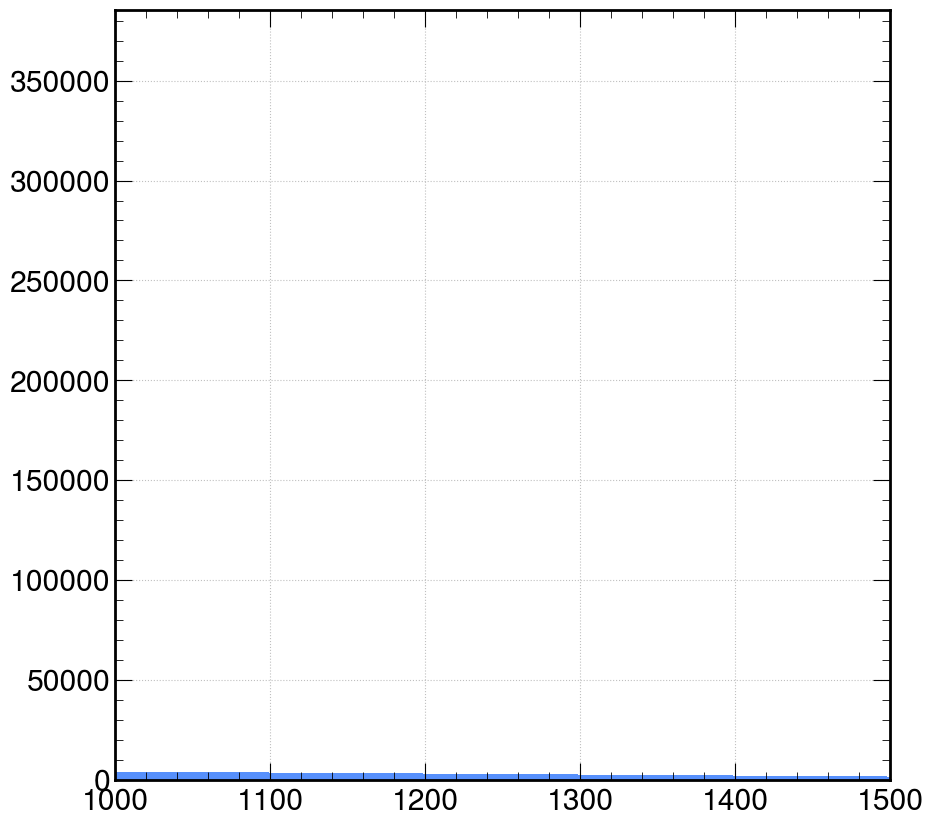

In [32]:
df_events.loc[df_events['PID'].isin([12, -12]), 'E'].hist(bins=50).set_xlim(1000, 1500)

array([[<Axes: title={'center': 'E'}>]], dtype=object)

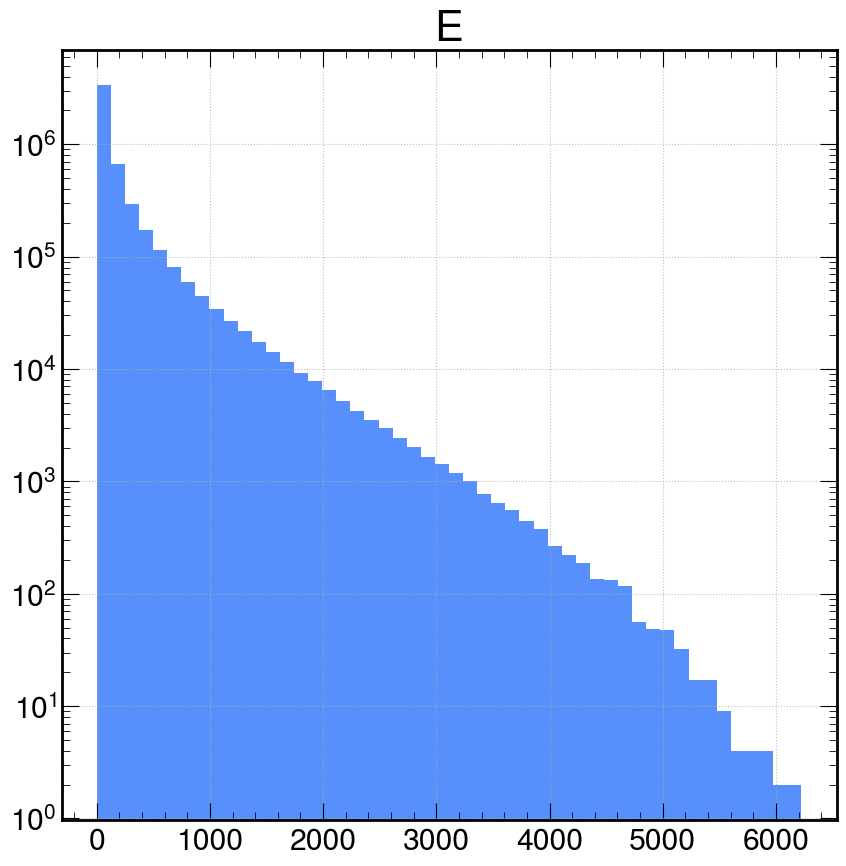

In [34]:
df_events.hist('E', bins=50, log=True)